<a href="https://colab.research.google.com/github/be-next/TP-IA/blob/main/TP_IA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression linéaire

La régression linéaire est une méthode statistique permettant de trouver une ligne droite qui "s'adapte" le mieux à un ensemble de points sur un plan. L'idée est de minimiser la distance entre chaque point de données et cette ligne, de manière à ce que la ligne représente au mieux la tendance des données.

En termes simples, si l'on a un ensemble de points $(x, y)$ et que l'on veut trouver la relation linéaire $y = mx + b$ (où $m$ est la pente de la ligne et $b$ est l'ordonnée à l'origine), la régression linéaire permet de calculer les valeurs de $m$ et de $b$.

<function matplotlib.pyplot.show(close=None, block=None)>

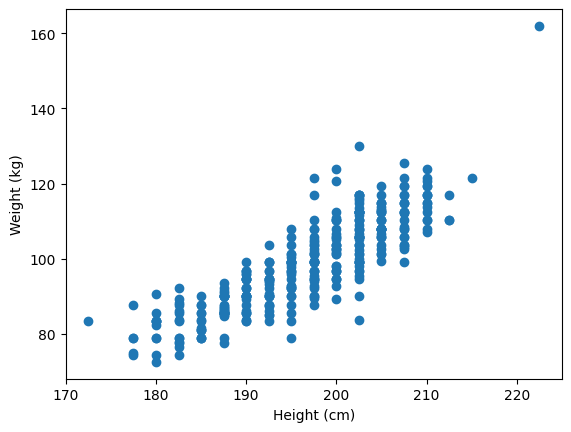

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
import numpy as np

dataset_url = "https://raw.githubusercontent.com/be-next/TP-IA/main/datasets/players_stats.csv"

df = pd.read_csv(dataset_url)

height = df.dropna()['Height']
weight = df.dropna()['Weight']

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.scatter(height, weight)
plt.show


## Calcul de la pente $m$

L'équation de la droite en régression linéaire est donnée par
\begin{equation}
    y = mx + b
\end{equation}
où $y$ est la variable dépendante, $x$ est la variable indépendante, $m$ est la pente de la droite, et $b$ est l'ordonnée à l'origine.

L'objectif est de trouver les valeurs de $m$ et $b$ qui minimisent la fonction de coût, qui est la somme des carrés des écarts (résidus) entre les valeurs observées $y_i$ et les valeurs prédites $\hat{y}_i = mx_i + b$. La fonction de coût est donc
\begin{equation}
    \text{Coût}(m, b) = \sum_{i=1}^{N} (y_i - (mx_i + b))^2
\end{equation}

Pour minimiser cette fonction, nous prenons ses dérivées partielles par rapport à $m$ et $b$ et les mettons à zéro.

La dérivée par rapport à $m$ est
\begin{equation}
    \frac{\partial}{\partial m} \sum_{i=1}^{N} (y_i - mx_i - b)^2 = -2 \sum_{i=1}^{N} x_i(y_i - mx_i - b)
\end{equation}

Mettre cette dérivée à zéro et résoudre pour $m$ donne
\begin{equation}
    -2 \sum_{i=1}^{N} x_i(y_i - mx_i - b) = 0
\end{equation}
\begin{equation}
    \sum_{i=1}^{N} x_iy_i = m \sum_{i=1}^{N} x_i^2 + b \sum_{i=1}^{N} x_i
\end{equation}

En résolvant simultanément avec la dérivée par rapport à $b$, on obtient finalement l'équation pour $m$
\begin{equation}
    m = \frac{N \sum xy - \sum x \sum y}{N \sum x^2 - (\sum x)^2}
\end{equation}

où $N$ est le nombre de points de données, et les sommes sont calculées sur tous les points de données.

Cette formule calcule la pente $m$ de la ligne de régression linéaire qui minimise la somme des carrés des écarts entre les points de données réels et les points prédits par la ligne.

## Calcul de l'ordonnée à l'origine $b$

Nous avons déjà l'équation de la droite en régression linéaire :
\begin{equation}
    y = mx + b
\end{equation}
où $y$ est la variable dépendante, $x$ est la variable indépendante, $m$ est la pente déjà calculée, et $b$ est l'ordonnée à l'origine que nous voulons trouver.

La fonction de coût est la somme des carrés des écarts entre les valeurs observées et prédites, donnée par :
\begin{equation}
    \text{Coût}(m, b) = \sum_{i=1}^{N} (y_i - (mx_i + b))^2
\end{equation}

Pour trouver $b$, nous prenons la dérivée partielle de la fonction de coût par rapport à $b$ et la mettons à zéro. La dérivée est :
\begin{equation}
    \frac{\partial}{\partial b} \sum_{i=1}^{N} (y_i - mx_i - b)^2 = -2 \sum_{i=1}^{N} (y_i - mx_i - b)
\end{equation}

Mettre cette dérivée à zéro donne :
\begin{equation}
    -2 \sum_{i=1}^{N} (y_i - mx_i - b) = 0
\end{equation}
\begin{equation}
    \sum_{i=1}^{N} y_i - m \sum_{i=1}^{N} x_i = Nb
\end{equation}

En isolant $b$, on obtient finalement :
\begin{equation}
    b = \frac{\sum y_i - m \sum x_i}{N}
\end{equation}

où $N$ est le nombre de points de données, et les sommes sont calculées sur tous les points de données.

Cette formule calcule l'ordonnée à l'origine $b$ de la ligne de régression linéaire, complétant ainsi les paramètres de l'équation de la droite qui s'ajuste le mieux aux données selon la méthode des moindres carrés.


In [6]:
def calculer_regression_lineaire(df, nom_col_x, nom_col_y):
    x = df.dropna()[nom_col_x]
    y = df.dropna()[nom_col_y]

    N = len(x)
    x_sum = x.sum()
    y_sum = y.sum()
    xy_sum = (x * y).sum()
    xx_sum = (x**2).sum()

    # Calcul de la pente
    m = (N * xy_sum - x_sum * y_sum) / (N * xx_sum - x_sum**2)

    # Calcul de l'ordonnée à l'origine
    b = (y_sum - m * x_sum) / N

    return m, b

In [7]:
m, b = calculer_regression_lineaire(df, 'Height', 'Weight')

print(f"Pente (m) = {m}")
print(f"Ordonnée à l'origine (b) = {b}")

Pente (m) = 1.2119088561220532
Ordonnée à l'origine (b) = -139.42268241565108


<function matplotlib.pyplot.show(close=None, block=None)>

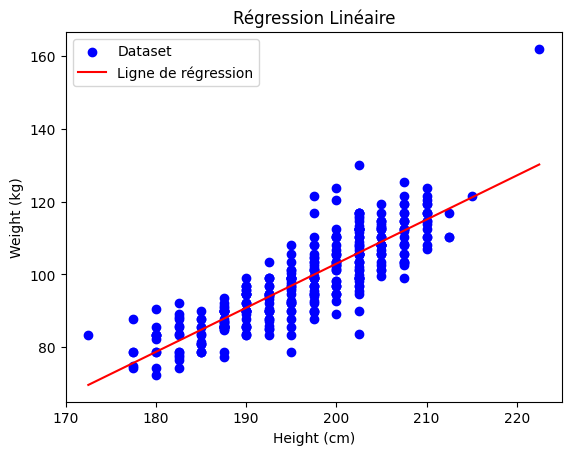

In [10]:
# Générer les valeurs x pour la ligne
x_ligne = np.linspace(min(df['Height']), max(df['Height']), 2)
# Calculer les valeurs y pour la ligne
y_ligne = m * x_ligne + b

plt.scatter(height, weight,color='blue', label='Dataset')
# Tracer la droite de régression
plt.plot(x_ligne, y_ligne, color='red', label='Ligne de régression')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Régression Linéaire')
plt.legend()

plt.show

La raison pour laquelle le calcul des dérivées est utilisé pour trouver la droite en régression linéaire vient du principe de la méthode des moindres carrés. Cette méthode vise à minimiser l'erreur entre les valeurs prédites par la droite de régression et les valeurs observées réelles.

## But de la Régression Linéaire

En régression linéaire, on cherche à ajuster une droite $y = mx + b$ aux données de manière à ce que la somme des carrés des distances verticales (écarts) entre les points de données et la droite soit minimale. Ces écarts sont appelés résidus ou erreurs.

## Fonction de Coût

La somme des carrés des résidus est formalisée dans une fonction de coût (ou fonction d'erreur) :
$$ \text{Coût}(m, b) = \sum_{i=1}^{N} (y_i - (mx_i + b))^2 $$
où $y_i$ est la valeur observée, $mx_i + b$ est la valeur prédite par la droite, et $N$ est le nombre de points de données.

## Utilisation des Dérivées

Pour trouver la droite qui minimise cette fonction de coût, on utilise le calcul différentiel, en particulier les dérivées. La minimisation est réalisée en trouvant les points où la dérivée de la fonction de coût par rapport à chacun des paramètres ($m$ et $b$) est zéro.

- Dérivée par rapport à $m$ et $b$ : On prend les dérivées partielles de la fonction de coût par rapport à $m$ et $b$ et on les égale à zéro. Cela donne deux équations (système d'équations linéaires) en $m$ et $b$.

- Point de Minimum : Les points où ces dérivées sont nulles correspondent aux points de minimum de la fonction de coût (dans ce cas, un minimum global puisque la fonction est parabolique et convexe en $m$ et $b$).

- Solution du Système : En résolvant ce système d'équations, on obtient les valeurs de $m$ et $b$ qui minimisent la fonction de coût, c'est-à-dire la droite qui s'ajuste le mieux aux données selon la méthode des moindres carrés.

